<a href="https://colab.research.google.com/github/Gumm11/Recommendation/blob/main/Jabar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas matplotlib seaborn scikit-learn hdbscan

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import hdbscan
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import random

# Bersih-bersih Data

In [5]:
df = pd.read_csv('data/jabar.csv')
df.head()

,keyword,Title,Reviews,Review_points,Address,Country,City,State,Website,Phone,...,Open_Time_Friday,Open_Time_Saturday,Open_Time_Sunday,Popular_times_Monday,Popular_times_Tuesday,Popular_times_Wednesday,Popular_times_Thursday,Popular_times_Friday,Popular_times_Saturday,Popular_times_Sunday
0,Things to do in West Java,Taman Mini Indonesia Indah,164385,4.6,"Jl. Taman Mini Indonesia Indah, Ceger, Kec. Ci...",ID,East Jakarta City,Jakarta,https://tamanmini.com/taman_jelajah_indonesia/,+62 804 178 9789,...,Friday 5 AM–8 PM 2024-11-29,Saturday 5 AM–8 PM 2024-11-23,Sunday 5 AM–8 PM 2024-11-24,0% busy at 4 AM;11% busy at 5 AM;13% busy at 6...,0% busy at 4 AM;13% busy at 5 AM;17% busy at 6...,0% busy at 4 AM;13% busy at 5 AM;16% busy at 6...,0% busy at 4 AM;13% busy at 5 AM;17% busy at 6...,0% busy at 4 AM;12% busy at 5 AM;14% busy at 6...,0% busy at 4 AM;19% busy at 5 AM;26% busy at 6...,0% busy at 4 AM;24% busy at 5 AM;32% busy at 6...
1,Things to do in West Java,Taman Safari Indonesia Bogor,64748,4.7,"Jalan Kapten Harun Kabir No.724, Cibeureum, Ke...",ID,Bogor Regency,West Java,https://bogor.tamansafari.com/,+62 251 8250000,...,Friday 9 AM–5 PM 2024-11-29,Saturday 8:30 AM–5 PM 6–9 PM 2024-11-23,Sunday 8:30 AM–5 PM 2024-11-24,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;43% busy at 8 ...,0% busy at 6 AM;0% busy at 7 AM;33% busy at 8 ...
2,Things to do in West Java,Mount Gede Pangrango National Park,5839,4.7,"Jl. Kebun Raya Cibodas, Cimacan, Kec. Cipanas,...",ID,Cianjur Regency,West Java,http://www.gedepangrango.org/,+62 263 512776,...,Friday 6 AM–6 PM 2024-11-29,Saturday 6 AM–6 PM 2024-11-23,Sunday 6 AM–6 PM 2024-11-24,0% busy at 5 AM;13% busy at 6 AM;16% busy at 7...,0% busy at 5 AM;12% busy at 6 AM;17% busy at 7...,0% busy at 5 AM;10% busy at 6 AM;13% busy at 7...,0% busy at 5 AM;16% busy at 6 AM;20% busy at 7...,0% busy at 5 AM;13% busy at 6 AM;21% busy at 7...,0% busy at 5 AM;49% busy at 6 AM;52% busy at 7...,0% busy at 5 AM;67% busy at 6 AM;73% busy at 7...
3,Things to do in West Java,Taman Jomblo,2779,4.1,"Jl. Tamansari No.66, Lb. Siliwangi, Kecamatan ...",ID,Bandung City,West Java,NaN,NaN,...,Friday Open 24 hours 2024-11-29,Saturday Open 24 hours 2024-11-23,Sunday Open 24 hours 2024-11-24,24% busy at 4 AM;42% busy at 5 AM;30% busy at ...,15% busy at 4 AM;9% busy at 5 AM;12% busy at 6...,6% busy at 4 AM;21% busy at 5 AM;51% busy at 6...,15% busy at 4 AM;30% busy at 5 AM;33% busy at ...,15% busy at 4 AM;36% busy at 5 AM;75% busy at ...,6% busy at 4 AM;15% busy at 5 AM;27% busy at 6...,6% busy at 4 AM;15% busy at 5 AM;9% busy at 6 ...
4,Things to do in West Java,Bird Pavilion at Pramestha,1589,4.3,"Jl. Akaza Utama No.9, Mekarwangi, Kec. Lembang...",ID,West Bandung Regency,West Java,NaN,+62 22 87791919,...,Friday 9 AM–5 PM 2024-11-29,Saturday 9 AM–5 PM 2024-11-23,Sunday 9 AM–5 PM 2024-11-24,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;0% busy at 8 A...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   keyword                  139 non-null    object 
 1   Title                    139 non-null    object 
 2   Reviews                  139 non-null    int64  
 3   Review_points            139 non-null    float64
 4   Address                  139 non-null    object 
 5   Country                  139 non-null    object 
 6   City                     139 non-null    object 
 7   State                    139 non-null    object 
 8   Website                  57 non-null     object 
 9   Phone                    83 non-null     object 
 10  Open_Time                139 non-null    object 
 11  Page_URL                 139 non-null    object 
 12  Google_id                139 non-null    object 
 13  Place_id                 139 non-null    object 
 14  Additional_info          6

In [7]:
df = df.dropna(subset=['Reviews', 'City', 'Latitude', 'Longitude'])
df = df[df['State'] == "West Java"]

df = df[['Title', 'Reviews', 'Review_points', 'Latitude', 'Longitude']]

df.head()

,Title,Reviews,Review_points,Latitude,Longitude
1,Taman Safari Indonesia Bogor,64748,4.7,-6.720649,106.950835
2,Mount Gede Pangrango National Park,5839,4.7,-6.737286,107.005308
3,Taman Jomblo,2779,4.1,-6.898129,107.609486
4,Bird Pavilion at Pramestha,1589,4.3,-6.840896,107.637664
5,Gunung Padang,4168,4.6,-6.993956,107.056271


In [8]:
df.isnull().sum()

,0
Title,0
Reviews,0
Review_points,0
Latitude,0
Longitude,0


In [9]:
df.duplicated().sum()

0

In [10]:
df['Title'] = df['Title'].astype('category')
df.dtypes

,0
Title,category
Reviews,int64
Review_points,float64
Latitude,float64
Longitude,float64


# Train Model

In [124]:
coords = df[['Latitude', 'Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [125]:
coords_rad = np.radians(coords)

clusterer = hdbscan.HDBSCAN(min_cluster_size=2, min_samples=1, cluster_selection_epsilon=0.00035)
cluster_labels = clusterer.fit_predict(coords_rad)

df['Cluster'] = cluster_labels

In [126]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = (cluster_labels == -1).sum()

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Points per cluster
print(df['Cluster'].value_counts())

Number of clusters: 30
Number of noise points: 19
Cluster
 27    32
-1     19
 29    17
 6      4
 14     4
 2      4
 16     4
 20     4
 18     3
 0      3
 25     3
 21     3
 4      3
 26     2
 9      2
 19     2
 5      2
 3      2
 24     2
 23     2
 8      2
 28     2
 12     2
 11     2
 22     2
 13     2
 7      2
 17     2
 1      2
 15     2
 10     2
Name: count, dtype: int64


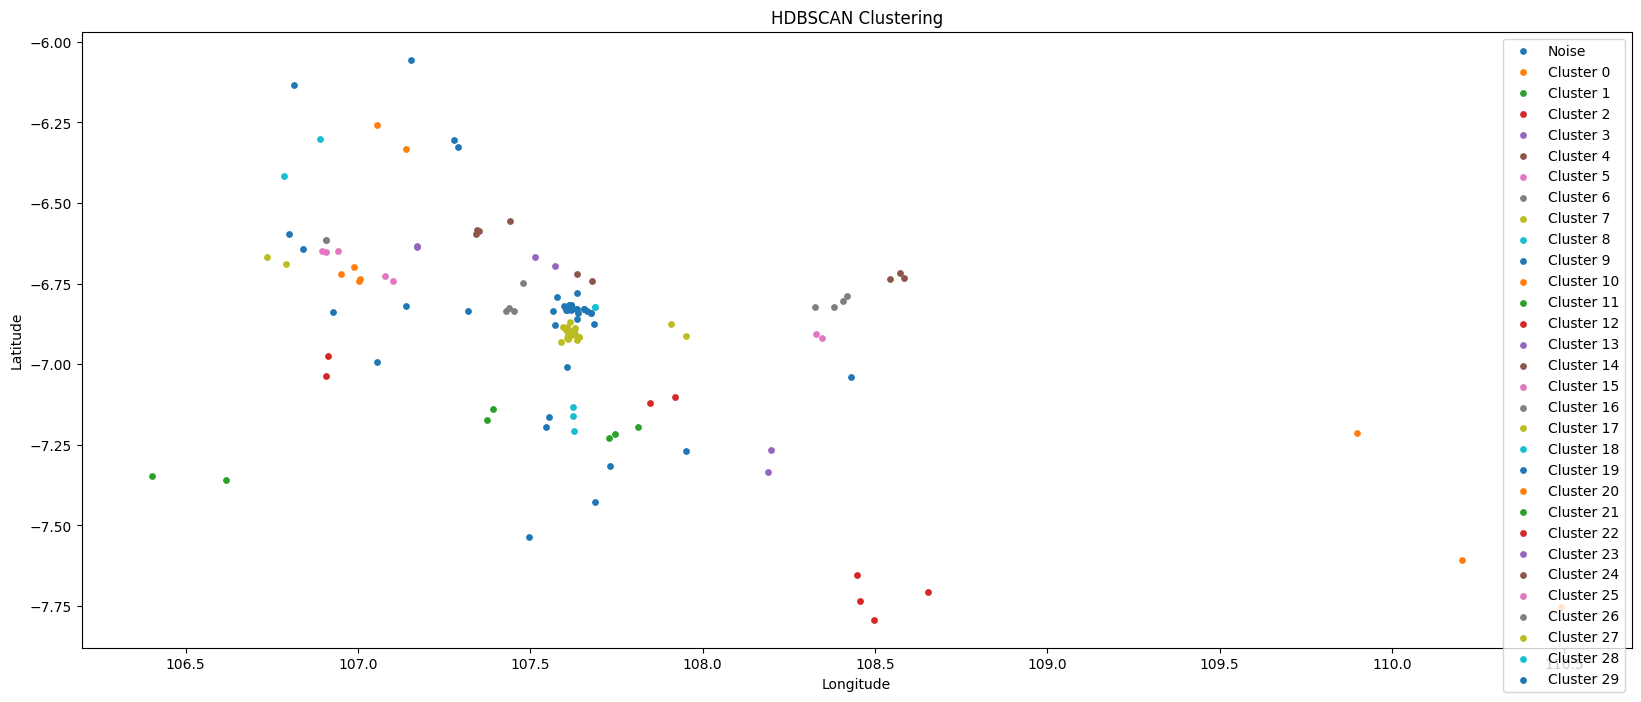

In [127]:
plt.figure(figsize=(20, 8))
for cluster_id in sorted(df['Cluster'].unique()):
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise"
    cluster_points = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_points['Longitude'], cluster_points['Latitude'], label=label, s=15)

plt.title("HDBSCAN Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [128]:
clusters = {}
for cluster_id in sorted(df['Cluster'].unique()):
    if cluster_id == -1:
        continue
    clusters[f"Cluster {cluster_id + 1}"] = df[df['Cluster'] == cluster_id][['Title', 'Latitude', 'Longitude']]

for day, locations in clusters.items():
    print(f"\n{day} ({len(locations)} locations):")
    print(locations)


Cluster 1 (3 locations):
                Title  Latitude   Longitude
64   Borobudur Temple -7.607874  110.203751
113     Dieng Plateau -7.214901  109.899439
121  Prambanan Temple -7.752021  110.491467

Cluster 2 (2 locations):
                Title  Latitude   Longitude
10   Cikaso Waterfall -7.360475  106.617578
128     Cibuaya Beach -7.347161  106.402700

Cluster 3 (4 locations):
                           Title  Latitude   Longitude
11                Madasari Beach -7.792409  108.496406
22      GREEN CANYON PANGANDARAN -7.735037  108.456452
45          Ciwayang Bodyrafting -7.652962  108.448553
47  Pangandaran White Sand Beach -7.705766  108.653358

Cluster 4 (2 locations):
                                 Title  Latitude   Longitude
63               Situ Gede Attractions -7.335280  108.189402
131  Wahana Edukasi Sukahaji Waterboom -7.267215  108.197635

Cluster 5 (3 locations):
                   Title  Latitude   Longitude
25   Sunyaragi Cave Park -6.737365  108.542758
104      K

In [129]:
joblib.dump(clusterer, 'jabar.pkl')
print("Model saved successfully!")

Model saved successfully!


# Test Hasil Cluster

In [130]:
model = joblib.load('jabar.pkl')

## User Input

### Sesuai data di dalam model

In [131]:
file_path = 'data/jabar.csv'
df = pd.read_csv(file_path)

# Randomly select 15 places from the dataset
user_input_places = df.sample(15)[['Title', 'Latitude', 'Longitude']]

user_input = {
    'places': user_input_places[['Title', 'Latitude', 'Longitude']].values.tolist(),
    # 'total_days': 2,
    # 'departure_time': '08:00',
    # 'return_time': '18:00'
}

# # Filter rows where City or Region indicates Bandung
# c_regency_places = df[df['City'].str.contains("Bandung", na=False, case=False)]

# # Randomly select 20 places concentrated in Bandung Regency
# user_input_places_bandung = bandung_regency_places.sample(20)[['Title', 'Latitude', 'Longitude']]

# # Create the user input structure
# user_input = {
#     'places': user_input_places_bandung[['Title', 'Latitude', 'Longitude']].values.tolist(),
#     # 'total_days': 2,
#     # 'departure_time': '08:00',
#     # 'return_time': '18:00'
# }

user_input

{'places': [['Taman Sejarah Bandung', -6.9101223, 107.6102605],
  ['Situ Wulukut', -7.038538, 108.4296985],
  ['Ujung Aspal - Pasirmuncang', -6.6944013, 107.5722896],
  ['Wayang Windu Bike Park', -7.2073348, 107.6271611],
  ['Waterland Cirebon', -6.7175191, 108.5733587],
  ['Tebing Citatah 48', -6.83564, 107.4284044],
  ['Citatah Cliff 125', -6.834934, 107.4539689],
  ['Batu Luhur', -6.8049286, 108.4078989],
  ["Atta'awun Puncak Mosque", -6.6992088, 106.9872814],
  ['Bukit Moko', -6.8421463, 107.67683],
  ['Wot Batu', -6.8596548, 107.6361348],
  ['Kebun Durian Warso Farm', -6.6902121, 106.7911815],
  ['Pangandaran White Sand Beach', -7.7057661, 108.6533582],
  ['Museum Geologi', -6.9007162, 107.6214553],
  ['Hot Water Bathing Cikundul Tirta Daya Budi', -6.9761236, 106.9131387]]}

### User Berkreasi (Data di luar model)

In [116]:
user_input = {
    'places': [
        ['Rainbow Garden Lembang', -6.8179384, 107.6184862],
        ['Mungsolkanas Mosque', -6.8917507, 107.6047965],
        ['La Fresa Farm (Wisata Petik Strawberry)', -6.8176814, 107.6114671],
        ['GOR dan Taman Saparua', -6.908557, 107.6161867],
        ['Jendela Alam', -6.819371, 107.596634],
        ['Dairyland Riverside Puncak Bogor', -6.652397, 106.9086908],
        ['Saint Peter Cathedral Bandung', -6.9148259, 107.6105009],
        ['Skywalker Via Ferrata', -6.5839045, 107.3462135],
        ['Ujung Aspal - Pasirmuncang', -6.6944013, 107.5722896],
        ['Pangandaran White Sand Beach', -7.7057661, 108.6533582],
        ["D'Kandang Depok", -6.4158763, 106.7845676],
        ['Situ Cipanten', -6.8234326, 108.3263131],
        ['Terasering Panyaweuyan', -6.9182104, 108.3451199],
        ['Karacak Valley', -7.2693522, 107.9508674],
        ['Air Terjun Curug Penganten', -6.8356288, 107.5656592],
        ['Random Place Bandung 1', -6.9108259, 106.1947851],
        ['Random Place Bandung 2', -6.9632821, 108.0341013],
        ['Random Place Bandung 3', -7.3092422, 107.9278492],
    ],
    # 'total_days': 2,
    # 'departure_time': '08:00',
    # 'return_time': '18:00'
}

user_input

{'places': [['Rainbow Garden Lembang', -6.8179384, 107.6184862],
  ['Mungsolkanas Mosque', -6.8917507, 107.6047965],
  ['La Fresa Farm (Wisata Petik Strawberry)', -6.8176814, 107.6114671],
  ['GOR dan Taman Saparua', -6.908557, 107.6161867],
  ['Jendela Alam', -6.819371, 107.596634],
  ['Dairyland Riverside Puncak Bogor', -6.652397, 106.9086908],
  ['Saint Peter Cathedral Bandung', -6.9148259, 107.6105009],
  ['Skywalker Via Ferrata', -6.5839045, 107.3462135],
  ['Ujung Aspal - Pasirmuncang', -6.6944013, 107.5722896],
  ['Pangandaran White Sand Beach', -7.7057661, 108.6533582],
  ["D'Kandang Depok", -6.4158763, 106.7845676],
  ['Situ Cipanten', -6.8234326, 108.3263131],
  ['Terasering Panyaweuyan', -6.9182104, 108.3451199],
  ['Karacak Valley', -7.2693522, 107.9508674],
  ['Air Terjun Curug Penganten', -6.8356288, 107.5656592],
  ['Random Place Bandung 1', -6.9108259, 106.1947851],
  ['Random Place Bandung 2', -6.9632821, 108.0341013],
  ['Random Place Bandung 3', -7.3092422, 107.92784

### Predict

In [132]:
# Extract only the coordinates (Latitude, Longitude) for clustering
user_coords = [(place[1], place[2]) for place in user_input['places']]

# Convert coordinates to radians
user_coords_rad = np.radians(user_coords)

# Predict clusters using HDBSCAN
cluster_labels = clusterer.fit_predict(user_coords_rad)

# Prepare DataFrame with Titles and Clusters
user_df = pd.DataFrame(user_input['places'], columns=['Title', 'Latitude', 'Longitude'])
user_df['Cluster'] = cluster_labels

print("\nUser Places with Clusters:")
print(user_df)


User Places with Clusters:
                                         Title  Latitude   Longitude  Cluster
0                        Taman Sejarah Bandung -6.910122  107.610260        2
1                                 Situ Wulukut -7.038538  108.429699        0
2                   Ujung Aspal - Pasirmuncang -6.694401  107.572290       -1
3                       Wayang Windu Bike Park -7.207335  107.627161       -1
4                            Waterland Cirebon -6.717519  108.573359        0
5                            Tebing Citatah 48 -6.835640  107.428404        3
6                            Citatah Cliff 125 -6.834934  107.453969        3
7                                   Batu Luhur -6.804929  108.407899        0
8                      Atta'awun Puncak Mosque -6.699209  106.987281        1
9                                   Bukit Moko -6.842146  107.676830        2
10                                    Wot Batu -6.859655  107.636135        2
11                     Kebun Durian 

## Hasil per Hari

### Display manusiawi

In [133]:
# Group locations by cluster
grouped_clusters = user_df.groupby('Cluster')

# Recommend days based on cluster groups
itinerary = {}
day = 1
for cluster_id, group in grouped_clusters:
    if cluster_id == -1:
        # Assign distant points to separate days
        for _, row in group.iterrows():
            itinerary[f"{day}"] = [row['Title']]
            day += 1
    else:
        # Include place names for valid clusters
        itinerary[f"{day}"] = group['Title'].tolist()
        day += 1

# Display itinerary
for day, locations in itinerary.items():
    print(f"\nSchedule: Day {day}")
    for location in locations:
        print(f"- {location}")

print("\nRecommended Total Days:", day)


Schedule: Day 1
- Ujung Aspal - Pasirmuncang

Schedule: Day 2
- Wayang Windu Bike Park

Schedule: Day 3
- Situ Wulukut
- Waterland Cirebon
- Batu Luhur
- Pangandaran White Sand Beach

Schedule: Day 4
- Atta'awun Puncak Mosque
- Kebun Durian Warso Farm
- Hot Water Bathing Cikundul Tirta Daya Budi

Schedule: Day 5
- Taman Sejarah Bandung
- Bukit Moko
- Wot Batu
- Museum Geologi

Schedule: Day 6
- Tebing Citatah 48
- Citatah Cliff 125

Recommended Total Days: 6


### Display tidak manusiawi

In [134]:
# Group locations by cluster
grouped_clusters = user_df.groupby('Cluster')

# Recommend days based on cluster groups
itinerary = {}
day = 1
for cluster_id, group in grouped_clusters:
    if cluster_id == -1:
        # Assign distant points to separate days
        for _, row in group.iterrows():
            itinerary[f"Day {day}"] = [row]
            day += 1
    else:
        itinerary[f"Day {day}"] = group
        day += 1

# Display the itinerary
for day, locations in itinerary.items():
    print(f"\n{day} Schedule:")
    print(locations)


Day 1 Schedule:
[Title        Ujung Aspal - Pasirmuncang
Latitude                      -6.694401
Longitude                     107.57229
Cluster                              -1
Name: 2, dtype: object]

Day 2 Schedule:
[Title        Wayang Windu Bike Park
Latitude                  -7.207335
Longitude                107.627161
Cluster                          -1
Name: 3, dtype: object]

Day 3 Schedule:
                           Title  Latitude   Longitude  Cluster
1                   Situ Wulukut -7.038538  108.429699        0
4              Waterland Cirebon -6.717519  108.573359        0
7                     Batu Luhur -6.804929  108.407899        0
12  Pangandaran White Sand Beach -7.705766  108.653358        0

Day 4 Schedule:
                                         Title  Latitude   Longitude  Cluster
8                      Atta'awun Puncak Mosque -6.699209  106.987281        1
11                     Kebun Durian Warso Farm -6.690212  106.791181        1
14  Hot Water Bathing Ci